In [16]:
!pip install xmltodict

In [17]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import xmltodict
# XML을 json처럼 parsing
from tqdm.auto import tqdm
# 오래걸리는 반복문 시각화

In [18]:
# plt.style.use(['seaborn-white'])

# 경로는 알아서 ㅎㅎ
PATH = '/content/drive/MyDrive/Colab Notebooks/mask_dataset'

# path에 파일을 확인
os.listdir(PATH)

"""
Prediction
['images', 'annotations']
"""

"\nPrediction\n['images', 'annotations']\n"

In [19]:
# 라벨(어노테이션)과 이미지의 경로를 지정
ANNOTATION_PATH = os.path.join(PATH, "annotations")
IMAGE_PATH = os.path.join(PATH, "images")

In [20]:
# path에 파일을 확인
os.listdir(ANNOTATION_PATH)[:30]
# os.listdir(IMAGE_PATH)[:10]

# 정렬이 필요하다!

['maksssksksss443.xml',
 'maksssksksss431.xml',
 'maksssksksss455.xml',
 'maksssksksss457.xml',
 'maksssksksss460.xml',
 'maksssksksss440.xml',
 'maksssksksss45.xml',
 'maksssksksss452.xml',
 'maksssksksss442.xml',
 'maksssksksss435.xml',
 'maksssksksss472.xml',
 'maksssksksss469.xml',
 'maksssksksss479.xml',
 'maksssksksss463.xml',
 'maksssksksss488.xml',
 'maksssksksss489.xml',
 'maksssksksss471.xml',
 'maksssksksss465.xml',
 'maksssksksss461.xml',
 'maksssksksss475.xml',
 'maksssksksss474.xml',
 'maksssksksss464.xml',
 'maksssksksss482.xml',
 'maksssksksss467.xml',
 'maksssksksss49.xml',
 'maksssksksss466.xml',
 'maksssksksss48.xml',
 'maksssksksss485.xml',
 'maksssksksss47.xml',
 'maksssksksss476.xml']

In [21]:

# sort의 기준을 찾자.

os.listdir(ANNOTATION_PATH)[10]
# print : 'maksssksksss472.xml'
# type : str

# . 이하를 버림
os.listdir(ANNOTATION_PATH)[10].split(".")
# Print : ['maksssksksss472', 'xml']

os.listdir(ANNOTATION_PATH)[10].split(".")[0]
# print : maksssksksss472
os.listdir(ANNOTATION_PATH)[6].split(".")[0]
# print : maksssksksss45

os.listdir(ANNOTATION_PATH)[10].split(".")[0][12:]
# print : 472
os.listdir(ANNOTATION_PATH)[6].split(".")[0][12:]
# print : 45

'45'

In [22]:
# 위에서 도출한 정렬기준으로 정렬
anno_list = sorted(os.listdir(ANNOTATION_PATH), key = lambda x : int(x.split(".")[0][12:]))
anno_list[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss2.xml',
 'maksssksksss3.xml',
 'maksssksksss4.xml',
 'maksssksksss5.xml',
 'maksssksksss6.xml',
 'maksssksksss7.xml',
 'maksssksksss8.xml',
 'maksssksksss9.xml']

In [23]:
# os.listdir(IMAGE_PATH)[6].split(".")[0]
img_list = sorted(os.listdir(IMAGE_PATH), key = lambda x : int(x.split(".")[0][12:]))
img_list[200:210]

['maksssksksss200.png',
 'maksssksksss201.png',
 'maksssksksss202.png',
 'maksssksksss203.png',
 'maksssksksss204.png',
 'maksssksksss205.png',
 'maksssksksss206.png',
 'maksssksksss207.png',
 'maksssksksss208.png',
 'maksssksksss209.png']

In [24]:
"""
# 불러오기 테스트
with open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        da = pd.json_normalize(anno_dict)

da

"""

"\n# 불러오기 테스트\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        da = pd.json_normalize(anno_dict)\n\nda\n\n"

In [25]:
"""# tqdm을 씌우면 학습할 때, 경과 나오는 것처럼 보여줌
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATION_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)"""

'# tqdm을 씌우면 학습할 때, 경과 나오는 것처럼 보여줌\nanno_json = []\n\nfor anno_filename in tqdm(anno_list):\n    with open(os.path.join(ANNOTATION_PATH, anno_filename), \'r\') as file:\n        anno_dict = xmltodict.parse(file.read())[\'annotation\']\n        anno_dict["object_num"] = len(anno_dict[\'object\'])\n        anno_json.append(anno_dict)'

In [26]:
anno_json[:20]

[OrderedDict([('folder', 'images'),
              ('filename', 'maksssksksss0.png'),
              ('size',
               OrderedDict([('width', '512'),
                            ('height', '366'),
                            ('depth', '3')])),
              ('segmented', '0'),
              ('object',
               [OrderedDict([('name', 'without_mask'),
                             ('pose', 'Unspecified'),
                             ('truncated', '0'),
                             ('occluded', '0'),
                             ('difficult', '0'),
                             ('bndbox',
                              OrderedDict([('xmin', '79'),
                                           ('ymin', '105'),
                                           ('xmax', '109'),
                                           ('ymax', '142')]))]),
                OrderedDict([('name', 'with_mask'),
                             ('pose', 'Unspecified'),
                             ('truncated', '0'),

In [27]:
# 문제점
# object가 하나만 있는 곳에서 len을 object 객체의 길이인 6을 반환한다.
# 하나만 있는 object를 배열로 묶자.
# 어떻게 구분??
"""
with open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        print(type(anno_dict['object']))

Output
<class 'collections.OrderedDict'>
"""
# 자료형이 다르구나!

"\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        print(type(anno_dict['object']))\n\nOutput\n<class 'collections.OrderedDict'>\n"

In [28]:
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATION_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        if type(anno_dict['object']) != list:
                anno_dict['object'] = [anno_dict['object']]
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)

In [29]:
anno_frame = pd.json_normalize(anno_json)
anno_frame

,folder,filename,segmented,object,object_num,size.width,size.height,size.depth
0,images,maksssksksss0.png,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",3,512,366,3
1,images,maksssksksss1.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,156,3
2,images,maksssksksss2.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,290,3
3,images,maksssksksss3.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,271,3
4,images,maksssksksss4.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3
...,...,...,...,...,...,...,...,...
848,images,maksssksksss848.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,268,3
849,images,maksssksksss849.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,236,3
850,images,maksssksksss850.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",3,400,200,3
851,images,maksssksksss851.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


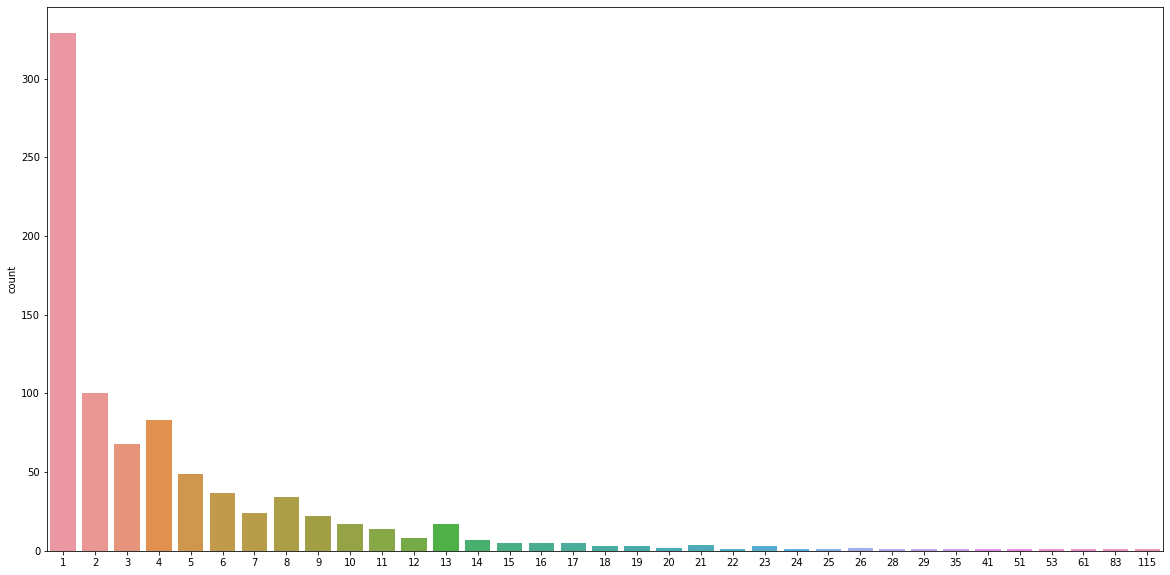

In [30]:
plt.figure(figsize=(20, 10))
sns.countplot(anno_frame.object_num.values)
plt.show()

In [46]:
from itertools import chain

num_object_per_images = anno_frame.object_num

image_data = pd.DataFrame({
    'filename': np.repeat(anno_frame['filename'], num_object_per_images), 
    'segmented': np.repeat(anno_frame['segmented'], num_object_per_images), 
    'object': chain.from_iterable(anno_frame['object'].values), 
    'width': np.repeat(anno_frame['size.width'], num_object_per_images),
    'height': np.repeat(anno_frame['size.height'], num_object_per_images),
    'depth': np.repeat(anno_frame['size.depth'], num_object_per_images)
})
image_data.reset_index(inplace=True, drop=True)

In [47]:
image_data

,filename,segmented,object,width,height,depth
0,maksssksksss0.png,0,"{'name': 'without_mask', 'pose': 'Unspecified'...",512,366,3
1,maksssksksss0.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",512,366,3
2,maksssksksss0.png,0,"{'name': 'without_mask', 'pose': 'Unspecified'...",512,366,3
3,maksssksksss1.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,156,3
4,maksssksksss1.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,156,3
...,...,...,...,...,...,...
4067,maksssksksss850.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,200,3
4068,maksssksksss850.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,200,3
4069,maksssksksss851.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",301,400,3
4070,maksssksksss852.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",267,400,3


In [49]:
objects = pd.DataFrame(image_data.object.map(dict).tolist())

data = pd.concat([image_data, objects], axis=1)
data.drop(columns='object', inplace=True)

In [52]:
data.describe()

,filename,segmented,width,height,depth,name,pose,truncated,occluded,difficult,bndbox
count,4072,4072,4072,4072,4072,4072,4072,4072,4072,4072,4072
unique,853,1,39,104,1,3,1,1,1,1,4071
top,maksssksksss603.png,0,400,267,3,with_mask,Unspecified,0,0,0,"{'xmin': '276', 'ymin': '115', 'xmax': '286', ..."
freq,115,4072,3684,986,4072,3232,4072,4072,4072,4072,2


In [55]:
processing_data = data.drop(columns='segmented', inplace=False)
processing_data = processing_data.drop(columns='truncated', inplace=False)
processing_data = processing_data.drop(columns='occluded', inplace=False)
processing_data = processing_data.drop(columns='difficult', inplace=False)
processing_data = processing_data.drop(columns='pose', inplace=False)

In [56]:
processing_data

,filename,width,height,depth,name,bndbox
0,maksssksksss0.png,512,366,3,without_mask,"{'xmin': '79', 'ymin': '105', 'xmax': '109', '..."
1,maksssksksss0.png,512,366,3,with_mask,"{'xmin': '185', 'ymin': '100', 'xmax': '226', ..."
2,maksssksksss0.png,512,366,3,without_mask,"{'xmin': '325', 'ymin': '90', 'xmax': '360', '..."
3,maksssksksss1.png,400,156,3,with_mask,"{'xmin': '321', 'ymin': '34', 'xmax': '354', '..."
4,maksssksksss1.png,400,156,3,with_mask,"{'xmin': '224', 'ymin': '38', 'xmax': '261', '..."
...,...,...,...,...,...,...
4067,maksssksksss850.png,400,200,3,with_mask,"{'xmin': '146', 'ymin': '30', 'xmax': '176', '..."
4068,maksssksksss850.png,400,200,3,with_mask,"{'xmin': '323', 'ymin': '47', 'xmax': '351', '..."
4069,maksssksksss851.png,301,400,3,with_mask,"{'xmin': '66', 'ymin': '205', 'xmax': '156', '..."
4070,maksssksksss852.png,267,400,3,with_mask,"{'xmin': '139', 'ymin': '94', 'xmax': '198', '..."


In [57]:
objects = pd.DataFrame(processing_data.bndbox.map(dict).tolist())
objects
# data = pd.concat([image_data, objects], axis=1)
# data.drop(columns='object', inplace=True)

,xmin,ymin,xmax,ymax
0,79,105,109,142
1,185,100,226,144
2,325,90,360,141
3,321,34,354,69
4,224,38,261,73
...,...,...,...,...
4067,146,30,176,60
4068,323,47,351,78
4069,66,205,156,330
4070,139,94,198,147


In [58]:
processing_data_box = pd.concat([processing_data, objects], axis=1)
processing_data_box.drop(columns='bndbox', inplace=True)

In [59]:
processing_data_box

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,maksssksksss0.png,512,366,3,without_mask,79,105,109,142
1,maksssksksss0.png,512,366,3,with_mask,185,100,226,144
2,maksssksksss0.png,512,366,3,without_mask,325,90,360,141
3,maksssksksss1.png,400,156,3,with_mask,321,34,354,69
4,maksssksksss1.png,400,156,3,with_mask,224,38,261,73
...,...,...,...,...,...,...,...,...,...
4067,maksssksksss850.png,400,200,3,with_mask,146,30,176,60
4068,maksssksksss850.png,400,200,3,with_mask,323,47,351,78
4069,maksssksksss851.png,301,400,3,with_mask,66,205,156,330
4070,maksssksksss852.png,267,400,3,with_mask,139,94,198,147


In [60]:
processing_data_box.to_csv('data.csv', index=False)

In [61]:
data = pd.read_csv('data.csv')

In [62]:
data.describe()

,width,height,depth,xmin,ymin,xmax,ymax
count,4072.000000,4072.000000,4072.0,4072.000000,4072.000000,4072.000000,4072.000000
mean,393.702849,270.123772,3.0,182.207024,85.780697,213.356090,120.785609
std,35.411593,52.340433,0.0,104.471254,52.571821,102.712267,70.355098
min,193.000000,156.000000,3.0,1.000000,1.000000,8.000000,6.000000
25%,400.000000,226.000000,3.0,96.000000,49.000000,134.000000,73.000000
50%,400.000000,267.000000,3.0,177.000000,75.000000,212.000000,103.000000
75%,400.000000,281.000000,3.0,266.000000,113.000000,292.000000,148.000000
max,600.000000,600.000000,3.0,569.000000,330.000000,592.000000,495.000000


In [63]:
data.info

<bound method DataFrame.info of                  filename  width  height  depth  ... xmin  ymin  xmax  ymax
0       maksssksksss0.png    512     366      3  ...   79   105   109   142
1       maksssksksss0.png    512     366      3  ...  185   100   226   144
2       maksssksksss0.png    512     366      3  ...  325    90   360   141
3       maksssksksss1.png    400     156      3  ...  321    34   354    69
4       maksssksksss1.png    400     156      3  ...  224    38   261    73
...                   ...    ...     ...    ...  ...  ...   ...   ...   ...
4067  maksssksksss850.png    400     200      3  ...  146    30   176    60
4068  maksssksksss850.png    400     200      3  ...  323    47   351    78
4069  maksssksksss851.png    301     400      3  ...   66   205   156   330
4070  maksssksksss852.png    267     400      3  ...  139    94   198   147
4071  maksssksksss852.png    267     400      3  ...   92    86   132   125

[4072 rows x 9 columns]>

In [64]:
data.head()

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,maksssksksss0.png,512,366,3,without_mask,79,105,109,142
1,maksssksksss0.png,512,366,3,with_mask,185,100,226,144
2,maksssksksss0.png,512,366,3,without_mask,325,90,360,141
3,maksssksksss1.png,400,156,3,with_mask,321,34,354,69
4,maksssksksss1.png,400,156,3,with_mask,224,38,261,73
